<a href="https://colab.research.google.com/github/VIOLDAVE/Massive-Algorithm/blob/main/Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install polars pyfpgrowth mlxtend spacy datasketch pyvis #rapids-cuml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.2 MB/s eta 0:00:00
  Created wheel for pyfpgrowth: filename=pyfpgrowth-1.0-py2.py3-none-any.whl size=5490 sha256=e9a0c9d9d201220e68c663635850bd281b7205b1ee55b07f2e17d94fb882efe8
  Stored in directory: /root/.cache/pip/wheels/f2/cf/03/d025f5c38b5e9cfbbe5e68ec539c2bf8dee7a9f8ee14629e2d
Successfully built pyfpgrowth


In [3]:
!pip install pyfpgrowth==1.0

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 362, in run
    resolver = self.make_resolver(
               ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 177, in make_resolver
    return pip._internal.resolution.resolvelib.resolver.Resolver(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 58, in __init__
    self.factory = Factory(
                  

In [12]:

import os
import polars as pl
from pathlib import Path

In [13]:
# Kaggle Authentication
os.environ["KAGGLE_USERNAME"] = "aworviola2"
os.environ["KAGGLE_KEY"] = "b10218d275dad1e914008b49da4f407d"
!mkdir -p ~/.kaggle
!echo '{"username":"aworviola2","key":"b10218d275dad1e914008b49da4f407d"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json  # Critical permission setting


In [14]:
dataset = "arashnic/book-recommendation-dataset"
data_dir = Path("data")
data_dir.mkdir(exist_ok=True)

Data downloading

In [15]:

!kaggle datasets download -d mohamedbakhet/amazon-books-reviews -p {data_dir} --unzip
df = pl.scan_csv(data_dir / "Books_rating.csv").collect()

Dataset URL: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
License(s): CC0-1.0
 99% 1.05G/1.06G [00:14<00:00, 33.0MB/s]
100% 1.06G/1.06G [00:14<00:00, 80.9MB/s]


Explorartory data analysis

In [16]:
display(df.head())

Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
str,str,f64,str,str,str,f64,i64,str,str
"""1882931173""","""Its Only Art If Its Well Hung!""",null,"""AVCGYZL8FQQTD""","""Jim of Oz ""jim-of-oz""""","""7/7""",4.0,940636800,"""Nice collection of Julie Strai…","""This is only for Julie Strain …"
"""0826414346""","""Dr. Seuss: American Icon""",null,"""A30TK6U7DNS82R""","""Kevin Killian""","""10/10""",5.0,1095724800,"""Really Enjoyed It""","""I don't care much for Dr. Seus…"
"""0826414346""","""Dr. Seuss: American Icon""",null,"""A3UH4UZ4RSVO82""","""John Granger""","""10/11""",5.0,1078790400,"""Essential for every personal a…","""If people become the books the…"
"""0826414346""","""Dr. Seuss: American Icon""",null,"""A2MVUWT453QH61""","""Roy E. Perry ""amateur philosop…","""7/7""",4.0,1090713600,"""Phlip Nel gives silly Seuss a …","""Theodore Seuss Geisel (1904-19…"
"""0826414346""","""Dr. Seuss: American Icon""",null,"""A22X4XUPKF66MR""","""D. H. Richards ""ninthwavestore…","""3/3""",4.0,1107993600,"""Good academic overview""","""Philip Nel - Dr. Seuss: Americ…"


In [17]:
display(df.describe())

statistic,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
str,str,str,f64,str,str,str,f64,f64,str,str
"""count""","""3000000""","""2999792""",481171.0,"""2438213""","""2438114""","""3000000""",3e6,3e6,"""2999962""","""2999992"""
"""null_count""","""0""","""208""",2.518829e6,"""561787""","""561886""","""0""",0.0,0.0,"""38""","""8"""
"""mean""",null,null,21.762656,null,null,null,4.215289,1.1323e9,null,null
"""std""",null,null,26.206541,null,null,null,1.203054,1.4932e8,null,null
"""min""","""0001047604""",""""" Film technique, "" and, "" Fil…",1.0,"""A00109803PZJ91RLT7DPN""","""""","""0/0""",1.0,-1.0,"""!""","""The Tao of Muhammad Ali is t…"
"""25%""",null,null,10.78,null,null,null,4.0,9.999072e8,null,null
"""50%""",null,null,14.93,null,null,null,5.0,1.1283e9,null,null
"""75%""",null,null,23.95,null,null,null,5.0,1.2691e9,null,null
"""max""","""B0064P287I""","""you can do anything with crepe…",995.0,"""AZZZZW74AAX75""","""~~~~~~~""","""997/1090""",5.0,1.3624e9,"""~~~~~~~~~~~~~~~~~~~~~~~~~~""","""~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~…"


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df.null_count()

Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,208,2518829,561787,561886,0,0,0,38,8


In [ ]:
display(df.is_duplicated().sum())

In [13]:
#!pip install ydata-profiling

In [ ]:
'''import ydata_profiling as ydp
import pandas as pd
from ydata_profiling import ProfileReport
profile = ProfileReport(df.to_pandas(), title="Profiling Report")
profile.to_notebook_iframe().  '''

'import ydata_profiling as ydp\nimport pandas as pd\nfrom ydata_profiling import ProfileReport\nprofile = ProfileReport(df.to_pandas(), title="Profiling Report")\nprofile.to_notebook_iframe().  '

What's the distribution of ratings? (Is there rating inflation?)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

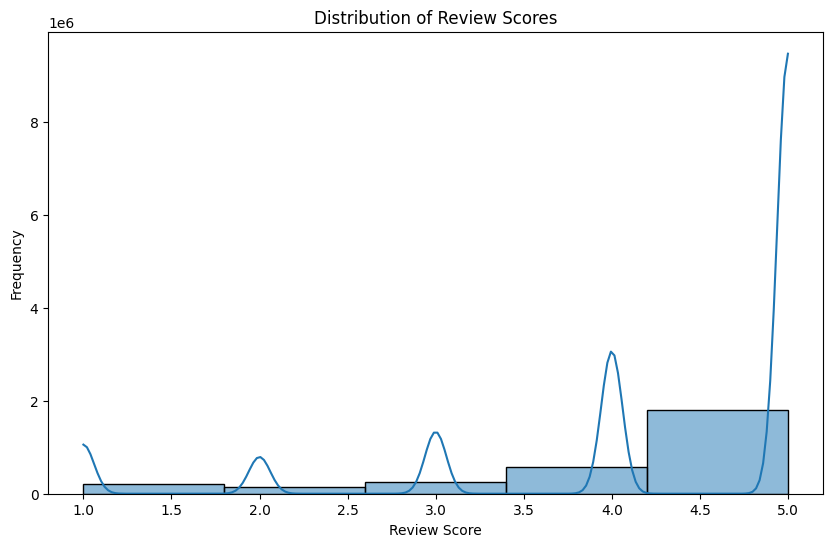

In [11]:

plt.figure(figsize=(10, 6))
sns.histplot(df['review/score'], bins=5, kde=True)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.show()

Which books have the most reviews?

In [12]:


# Top 10 most reviewed books
top_books = df.group_by("Title").agg(pl.len().alias("review_count")).sort("review_count", descending=True).head(10)
print(top_books)

shape: (10, 2)
┌─────────────────────────────────┬──────────────┐
│ Title                           ┆ review_count │
│ ---                             ┆ ---          │
│ str                             ┆ u32          │
╞═════════════════════════════════╪══════════════╡
│ The Hobbit                      ┆ 22023        │
│ Pride and Prejudice             ┆ 20371        │
│ Atlas Shrugged                  ┆ 12513        │
│ Wuthering Heights               ┆ 10780        │
│ The Giver                       ┆ 7644         │
│ Great Expectations              ┆ 7421         │
│ Harry Potter and The Sorcerer'… ┆ 6796         │
│ Of Mice and Men                 ┆ 6728         │
│ Brave New World                 ┆ 6312         │
│ Mere Christianity               ┆ 6053         │
└─────────────────────────────────┴──────────────┘


Average review trend by years.

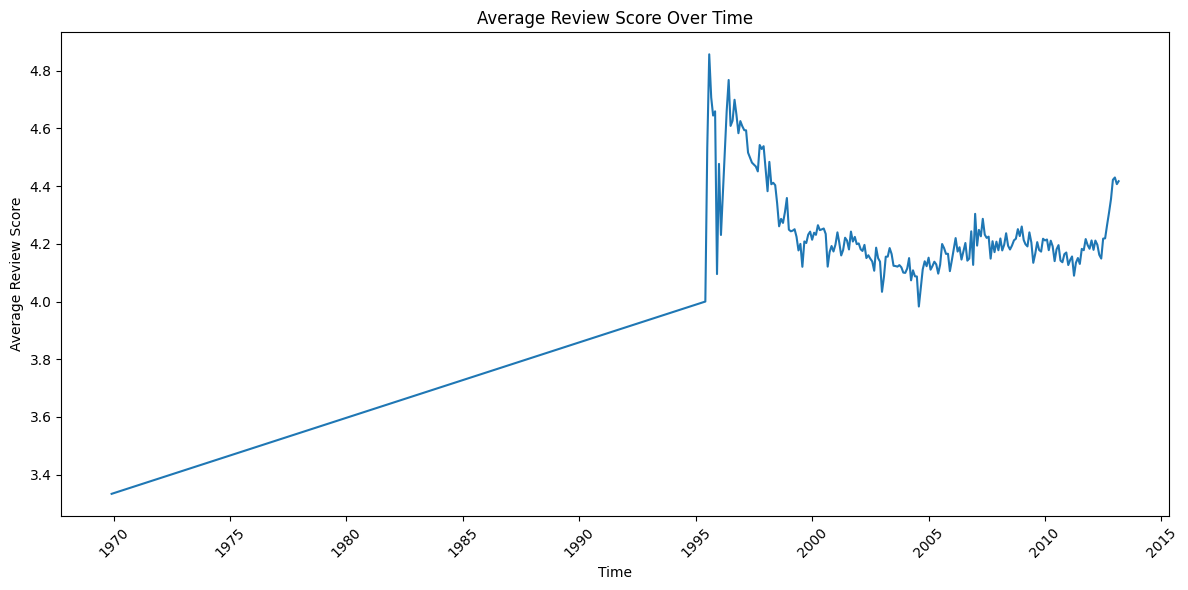

In [13]:
# Convert review/time to datetime
df = df.with_columns(pl.from_epoch(pl.col("review/time")).cast(pl.Datetime).alias("review_datetime"))

# Group by month and calculate the average review score
monthly_avg_score = df.group_by(pl.col("review_datetime").dt.truncate("1mo")).agg(pl.mean("review/score").alias("average_score")).sort("review_datetime")

# average review score over time plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_score["review_datetime"], monthly_avg_score["average_score"])
plt.title('Average Review Score Over Time')
plt.xlabel('Time')
plt.ylabel('Average Review Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Rating distribution

/tmp/ipython-input-13-2852197680.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["review/score"].to_numpy(),palette="viridis")


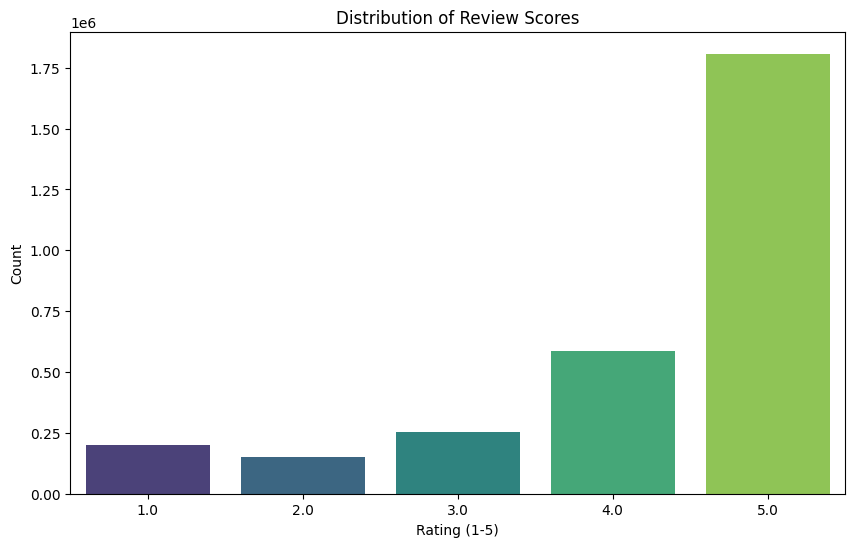

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df["review/score"].to_numpy(),palette="viridis")
plt.title("Distribution of Review Scores")
plt.xlabel("Rating (1-5)")
plt.ylabel('Count')
plt.show()


Review length.How much time it takes to review a book.

In [14]:
#  review length column
df = df.with_columns(
    pl.col("review/text").str.len_chars().alias("review_length")
)


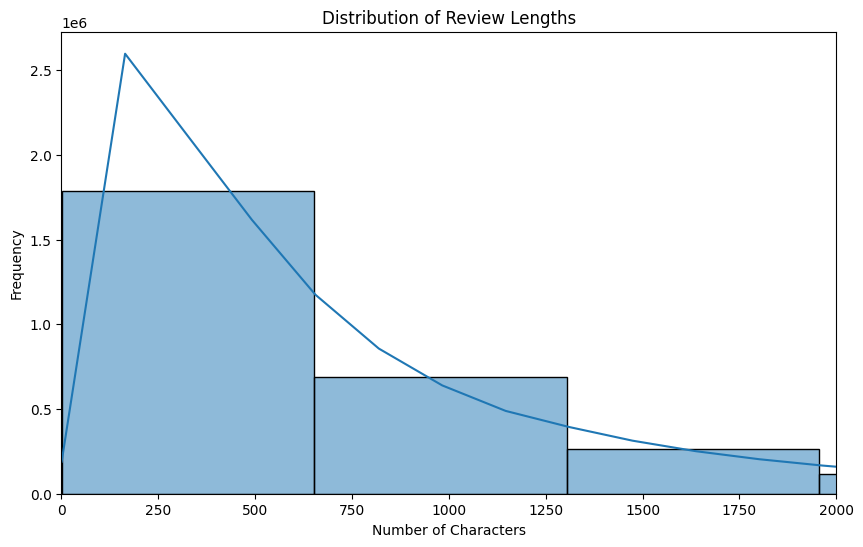

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df["review_length"].to_numpy(), bins=50, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.xlim(0, 2000)  #adjust as needed
plt.show()

Book review for each year.Are there any temporal trends in reviews?

In [20]:
# Convert timestamp
df = df.with_columns(
    pl.col("review_datetime").dt.year().alias("year")
)


# Reviews per year
reviews_per_year = df.group_by("year").agg(pl.len().alias("count"))
reviews_per_year_sorted = reviews_per_year.sort("year")



ColumnNotFoundError: review_datetime

Resolved plan until failure:

	---> FAILED HERE RESOLVING 'with_columns' <---
DF ["Id", "Title", "Price", "User_id"]; PROJECT */11 COLUMNS

In [18]:
plt.figure(figsize=(12, 6))
plt.bar(reviews_per_year_sorted["year"].to_numpy(), reviews_per_year_sorted["count"].to_numpy())
plt.title("Reviews Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NameError: name 'reviews_per_year_sorted' is not defined

<Figure size 1200x600 with 0 Axes>

Rating Vs reviewing.Are longer reviews associated with higher/lower ratings?

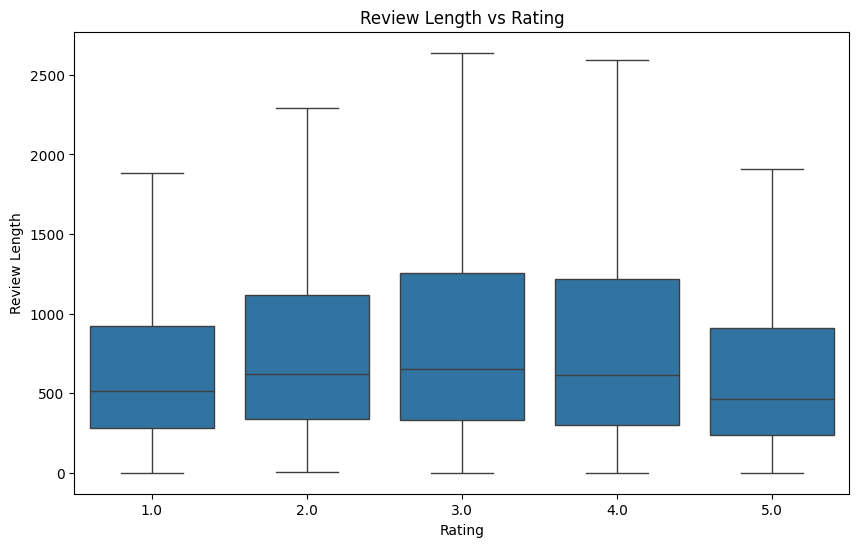

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["review/score"].to_numpy(), y=df["review_length"].to_numpy(), showfliers=False)

plt.title("Review Length vs Rating")
plt.xlabel("Rating")
plt.ylabel("Review Length")
plt.show()
plt

Who are the top reviewers.

In [21]:
top_reviewers = df.group_by("Id").agg(
    pl.len().alias("review_count"),
    pl.mean("review/score").alias("average_rating")
).sort("review_count", descending=True).head(10)
print(top_reviewers)


shape: (10, 3)
┌────────────┬──────────────┬────────────────┐
│ Id         ┆ review_count ┆ average_rating │
│ ---        ┆ ---          ┆ ---            │
│ str        ┆ u32          ┆ f64            │
╞════════════╪══════════════╪════════════════╡
│ B000IEZE3G ┆ 6796         ┆ 4.739258       │
│ B000ILIJE0 ┆ 4438         ┆ 4.657503       │
│ B000GQG7D2 ┆ 4428         ┆ 4.657633       │
│ B000GQG5MA ┆ 4427         ┆ 4.665914       │
│ B000NDSX6C ┆ 4426         ┆ 4.657027       │
│ B000NWU3I4 ┆ 4420         ┆ 4.658597       │
│ B000PC54NG ┆ 4402         ┆ 4.657883       │
│ B000NWQXBA ┆ 4397         ┆ 4.657494       │
│ B000Q032UY ┆ 4373         ┆ 4.655843       │
│ B000H9R1Q0 ┆ 4370         ┆ 4.655606       │
└────────────┴──────────────┴────────────────┘


correlation matrix

Top reviewers

Text review Analysis. Which words are used for positve reviews

In [22]:
positive_reviews = (
    df.filter(pl.col("review/score") >= 4)
      .select(pl.col("review/text").drop_nulls())
      .to_series()
      .to_numpy()
)

In [ ]:
from wordcloud import WordCloud

try:
    # Generate with proper text preprocessing
    text = " ".join(str(review) for review in positive_reviews if review)

    #positive_reviews = [str(review) for review in positive_reviews if review]

    wc = WordCloud(
        collocations=False,  # disable word pairs
        width=1200,
        height=600,
        max_font_size=200,
        background_color='white',
        colormap='viridis'  # color scheme
    ).generate(text)

    plt.figure(figsize=(15, 8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title("Most Frequent Words in Positive Reviews", fontsize=20, pad=20)
    plt.show()

except Exception as e:
    print(f"Error generating word cloud: {e}")
    '''# Fallback to frequency plot if wordcloud fails
    from collections import Counter
    words = text.split()
    freq = Counter(words).most_common(20)
    plt.barh([w[0] for w in freq], [w[1] for w in freq])
    plt.title("Top 20 Words (Fallback)")
    plt.show()'''


Handle missing valuse

In [11]:
df=df.with_columns([
    pl.col("review/text").fill_null(" "),
    pl.col("review/score").fill_null(3.0)
    ])

#Remove bot-like users(100* reviews in a day)
suspicious_users=df.group_by("user_id").agg(
    (pl.col("review/time").max() -pl.col("review/time").min ()).alias("span")
    ).filter(pl.col("span")<86400).select("user_id")

df=df.join(suspicious_users,on="user_id",how="anti")


ColumnNotFoundError: user_id

Resolved plan until failure:

	---> FAILED HERE RESOLVING 'group_by' <---
DF ["Id", "Title", "Price", "User_id"]; PROJECT */10 COLUMNS